In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import os
import tensorflow as tf

## Data Restructuring

In [2]:
# getting the path of directory which contains images, need to include absolute path
data_dir_windows=pathlib.Path('C:/Users/Gouri/Desktop/SRIP/5Class/Images')
data_dir='5Class/Images'

In [3]:
#Getting folders list
folders=os.listdir(data_dir)
folders

['antelope', 'badger', 'bat', 'bear', 'bee']

In [4]:
#list of paths of files for each folder
files_dict={}
labels_dict={} # {'category':index} dictionary
idx=0
for folder in folders:
    files_dict[folder]=list(data_dir_windows.glob(folder+'/*'))
    labels_dict[folder]=idx
    idx+=1

In [5]:
labels_dict

{'antelope': 0, 'badger': 1, 'bat': 2, 'bear': 3, 'bee': 4}

In [6]:
#Storing images array in X and corresponding labels in y
X,y=[],[]


for folder,images in files_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        img=cv2.resize(img,(150,150))
        X.append(img)
        y.append(labels_dict[folder])

In [7]:
X=np.array(X)
y=np.array(y)
X=X/255.

In [10]:
y_ovr=keras.utils.to_categorical(y, num_classes=5)
y_ovr

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [26]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4]), array([60, 60, 60, 60, 60], dtype=int64))

## Creating a normal test train split

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y)

In [28]:
X_train=np.array(X_train)
X_test=np.array(X_test)

In [29]:
print(len(X_train))
print(len(X_test))

210
90


In [30]:
y_test[:5]

array([3, 1, 4, 1, 3])

In [31]:
from tensorflow import keras

In [32]:
y_train_hc = keras.utils.to_categorical(y_train, num_classes=5)
y_test_hc = keras.utils.to_categorical(y_test, num_classes=5)

In [33]:
y_test_hc[:5]

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [34]:
print(type(y_test_hc))

<class 'numpy.ndarray'>


## Defining create model function

In [11]:
from tensorflow import keras

In [12]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [13]:
def create_model():
    model=Sequential()


    model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
    model.add(MaxPool2D((2,2)))

    model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D((2,2)))


    model.add(Flatten())

    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(5,activation='softmax'))
    
    return model

In [56]:
first_model=create_model()
first_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [57]:
batch_size=32
train_batches=len(X_train)//batch_size
test_batches=len(X_test)//batch_size
print(train_batches)
print(test_batches)

6
2


In [58]:
first_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 82944)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               10616960  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [59]:
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=8,mode="max")

## Fitting model of test, train dataset

In [60]:
history=first_model.fit(X_train,y_train_hc,epochs=50,validation_data=(X_test,y_test_hc),steps_per_epoch=2,callbacks=[callback])

Epoch 1/50
2/2 [==============================] - 9s 3s/step - loss: 4.4245 - accuracy: 0.1714 - val_loss: 2.7966 - val_accuracy: 0.2444
Epoch 2/50
2/2 [==============================] - 5s 3s/step - loss: 3.8645 - accuracy: 0.2524 - val_loss: 1.8471 - val_accuracy: 0.2667
Epoch 3/50
2/2 [==============================] - 5s 3s/step - loss: 1.9081 - accuracy: 0.3286 - val_loss: 1.5101 - val_accuracy: 0.4556
Epoch 4/50
2/2 [==============================] - 5s 3s/step - loss: 1.5345 - accuracy: 0.3524 - val_loss: 1.4669 - val_accuracy: 0.3556
Epoch 5/50
2/2 [==============================] - 5s 3s/step - loss: 1.3955 - accuracy: 0.4000 - val_loss: 1.4219 - val_accuracy: 0.4000
Epoch 6/50
2/2 [==============================] - 5s 3s/step - loss: 1.2837 - accuracy: 0.4952 - val_loss: 1.3714 - val_accuracy: 0.4667
Epoch 7/50
2/2 [==============================] - 5s 3s/step - loss: 1.2104 - accuracy: 0.6095 - val_loss: 1.3974 - val_accuracy: 0.4222
Epoch 8/50
2/2 [=========================

In [61]:
first_model.evaluate(X_test,y_test_hc)

3/3 [==============================] - 1s 169ms/step - loss: 1.0256 - accuracy: 0.6778


[1.0255661010742188, 0.6777777671813965]

In [62]:
predictions=first_model.predict(X_test)
y_pred=np.argmax(predictions,axis=1)

In [63]:
print(y_pred)
print(y_test)

[3 4 4 1 2 0 2 0 3 2 1 2 4 3 0 3 3 2 4 1 0 4 0 0 1 3 3 0 4 4 1 1 2 1 2 2 2
 3 3 3 3 3 4 3 4 4 4 1 1 4 1 4 1 0 4 4 1 3 0 0 4 1 1 1 2 1 4 4 1 1 3 3 0 0
 3 0 0 3 2 3 3 0 2 3 4 0 1 2 0 2]
[3 1 4 1 3 0 2 0 3 4 3 4 0 1 0 3 3 2 4 1 0 3 0 0 2 1 1 0 4 4 1 1 2 1 2 2 2
 3 2 3 2 2 4 0 4 2 4 2 1 4 1 4 3 0 4 3 4 3 0 1 4 1 0 1 1 1 2 4 1 2 0 3 2 0
 3 0 4 3 4 3 3 0 2 3 4 0 1 2 0 2]


In [65]:
first_model.metrics_names

['loss', 'accuracy']

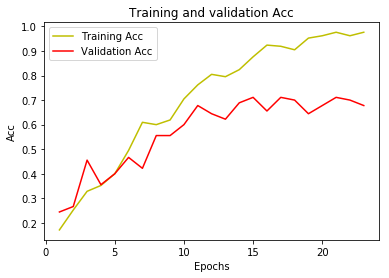

In [66]:
#plot the training and validation accuracy and loss at each epoch history was empty so return model as something and then access something.history there
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'y', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

## Evaluation on classification metrics

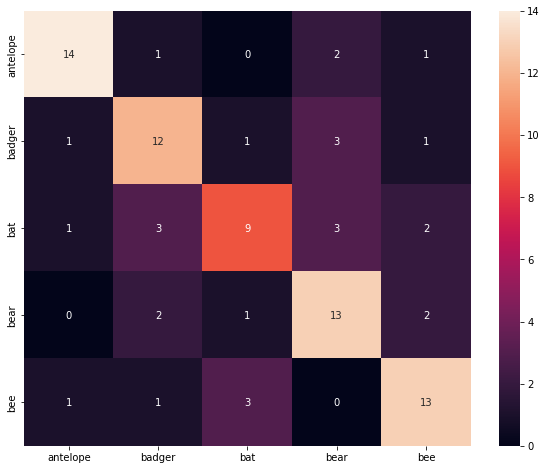

In [73]:
from sklearn.metrics import confusion_matrix, classification_report
cf=confusion_matrix(y_test,y_pred)
cf
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(cf,annot=True,xticklabels=folders,yticklabels=folders)

In [68]:
labels_dict={0:'antelope',1:'badger',2:'bat',3:'bear',4:'bee'}
labels_dict.values()

dict_values(['antelope', 'badger', 'bat', 'bear', 'bee'])

In [69]:
print(classification_report(y_test,y_pred,target_names=labels_dict.values()))

             precision    recall  f1-score   support

   antelope       0.82      0.78      0.80        18
     badger       0.63      0.67      0.65        18
        bat       0.64      0.50      0.56        18
       bear       0.62      0.72      0.67        18
        bee       0.68      0.72      0.70        18

avg / total       0.68      0.68      0.68        90



## 3 Fold Cross Validation

In [14]:
callback = keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy',patience=8,mode="max")

In [15]:
from sklearn.model_selection import KFold
import numpy as np
history_rec={}
for kfold, (train, test) in enumerate(KFold(n_splits=3, 
                                shuffle=True).split(X, y_ovr)):
    # clear the session 
    tf.keras.backend.clear_session()
    # calling the model and compile it 
    seq_model = create_model()
    seq_model.compile(
        loss  = tf.keras.losses.CategoricalCrossentropy(),
        metrics  = tf.keras.metrics.CategoricalAccuracy(),
        optimizer = tf.keras.optimizers.Adam())
    print('Train Set')
    print(X[train].shape)
    print(y_ovr[train].shape)
    print('Test Set')
    print(X[test].shape)
    print(y_ovr[test].shape)
    # run the model 
    history=seq_model.fit(X[train], y_ovr[train],
              batch_size=32, epochs=50, validation_data=(X[test], y_ovr[test]),steps_per_epoch=2,callbacks=[callback])
    history_rec[kfold]=history.history
    
    seq_model.save(f'wg_{kfold}.keras')

Train Set
(200, 150, 150, 3)
(200, 5)
Test Set
(100, 150, 150, 3)
(100, 5)
Epoch 1/50
2/2 [==============================] - 3s 1s/step - loss: 5.8200 - categorical_accuracy: 0.1875 - val_loss: 10.3418 - val_categorical_accuracy: 0.2000
Epoch 2/50
2/2 [==============================] - 2s 1s/step - loss: 7.7232 - categorical_accuracy: 0.2031 - val_loss: 2.3902 - val_categorical_accuracy: 0.1900
Epoch 3/50
2/2 [==============================] - 2s 1s/step - loss: 3.6201 - categorical_accuracy: 0.2031 - val_loss: 2.0691 - val_categorical_accuracy: 0.1900
Epoch 4/50
2/2 [==============================] - 2s 1s/step - loss: 1.9362 - categorical_accuracy: 0.2250 - val_loss: 1.6376 - val_categorical_accuracy: 0.2000
Epoch 5/50
2/2 [==============================] - 2s 1s/step - loss: 1.6042 - categorical_accuracy: 0.2969 - val_loss: 1.6063 - val_categorical_accuracy: 0.1800
Epoch 6/50
2/2 [==============================] - 2s 1s/step - loss: 1.5996 - categorical_accuracy: 0.2188 - val_loss: 

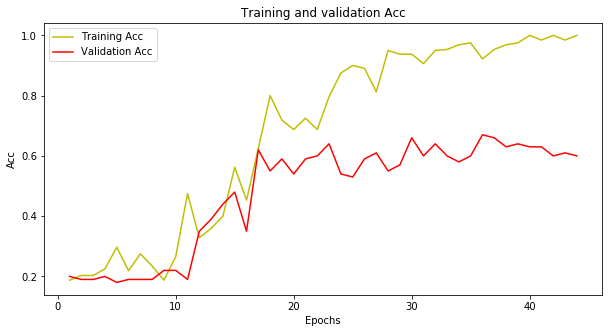

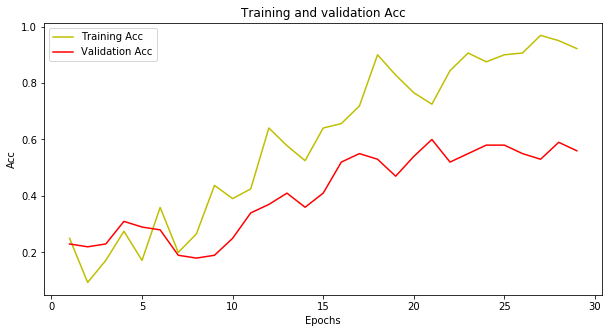

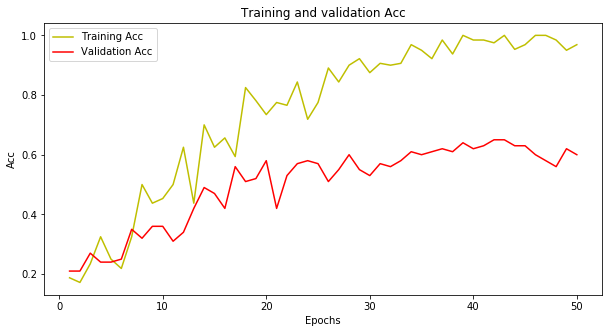

In [22]:
#plot the training and validation accuracy and loss at each epoch history was empty so return model as something and then access something.history there
for key,rec in history_rec.items():
    acc = rec['categorical_accuracy']
    val_acc = rec['val_categorical_accuracy']
    epochs = range(1, len(acc) + 1)
    plt.figure(figsize=(10,5))
    plt.plot(epochs, acc, 'y', label='Training Acc')
    plt.plot(epochs, val_acc, 'r', label='Validation Acc')
    plt.title('Training and validation Acc')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()
    plt.show()

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

For model 0
             precision    recall  f1-score   support

          0       1.00      0.89      0.94        18
          1       0.90      1.00      0.95        18
          2       0.81      0.94      0.87        18
          3       0.94      0.83      0.88        18
          4       0.88      0.83      0.86        18

avg / total       0.91      0.90      0.90        90

For model 1
             precision    recall  f1-score   support

          0       0.68      0.94      0.79        18
          1       0.93      0.78      0.85        18
          2       0.93      0.78      0.85        18
          3       0.82      0.78      0.80        18
          4       0.89      0.89      0.89        18

avg / total       0.85      0.83      0.84        90

For model 2
             precision    recall  f1-score   support

          0       1.00      0.89      0.94        18
          1       0.76      0.89      0.82        18
          2       0.93      0.78      0.85        18
   

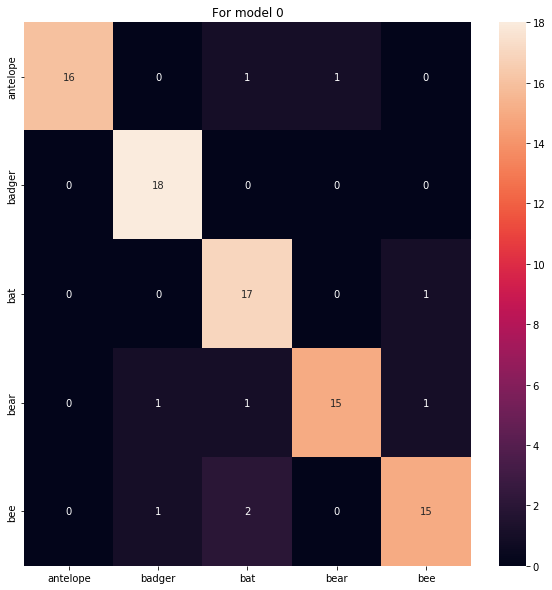

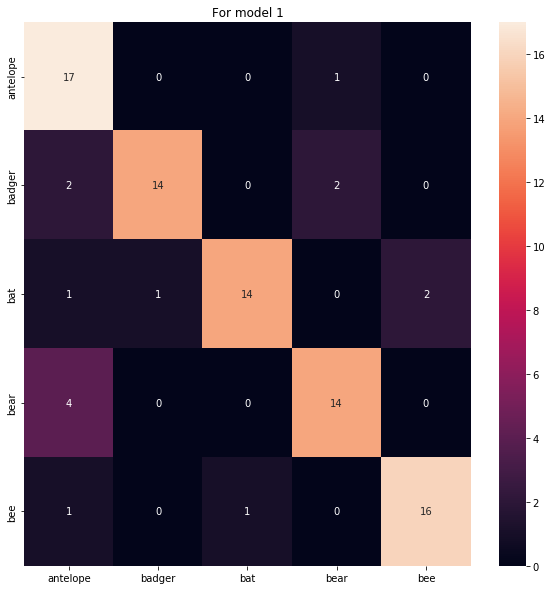

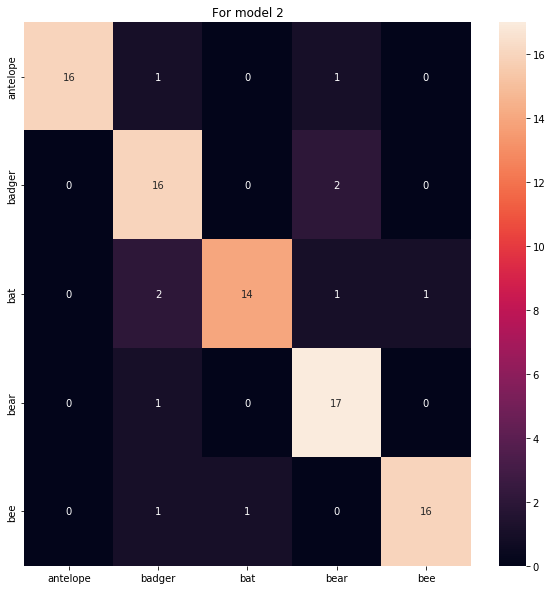

In [39]:
for idx in range(3):
    tf.keras.backend.clear_session()
    model=keras.models.load_model(f'wg_{idx}.keras')
    pred=model.predict(X_test)
    y_pred=np.argmax(pred,axis=1)
    plt.figure(figsize=(10,10))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,xticklabels=folders,yticklabels=folders)
    plt.title(f'For model {idx}')
    print(f'For model {idx}')
    print(classification_report(y_test,y_pred))

## Convolutional layers feature maps

In [40]:
import PIL
from keras.preprocessing import image

In [43]:
# Pre-processing the image
image_path='5Class/Images/badger/10a6d3492c.jpg'
img = image.load_img(image_path, target_size = (150, 150)) 
img_tensor = image.img_to_array(img) 
img_tensor = np.expand_dims(img_tensor, axis = 0) 
img_tensor = img_tensor / 255.

(1, 150, 150, 3)


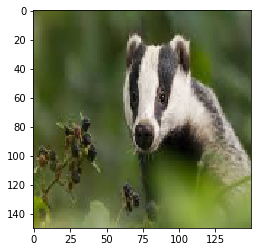

In [44]:
print(img_tensor.shape) 
plt.imshow(img_tensor[0]) 
plt.show() 

In [45]:
model=tf.keras.models.load_model('wg_2.keras')

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 82944)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               10616960  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [48]:
# Outputs of the 4 layers, which include conv2D and max pooling layers 
layer_outputs = [layer.output for layer in model.layers[:4]] 
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs) 
activations = activation_model.predict(img_tensor) 

In [49]:
layer_names = [] 
  
for layer in model.layers[:4]: 
  layer_names.append(layer.name) 
print(layer_names) 

['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1']


The shape of the conv2d is =======>> (1, 148, 148, 32)
The shape of the max_pooling2d is =======>> (1, 74, 74, 32)
The shape of the conv2d_1 is =======>> (1, 72, 72, 64)
The shape of the max_pooling2d_1 is =======>> (1, 36, 36, 64)


C:\Users\Gouri\anaconda3\envs\python-cvcourse\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


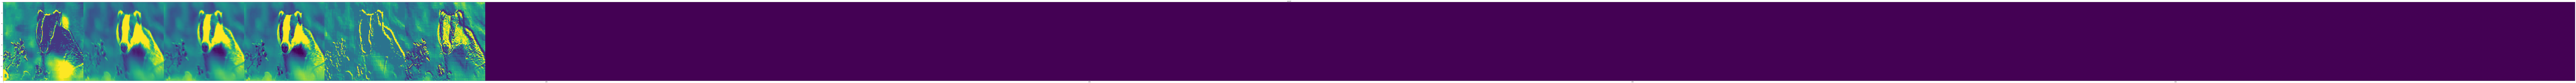

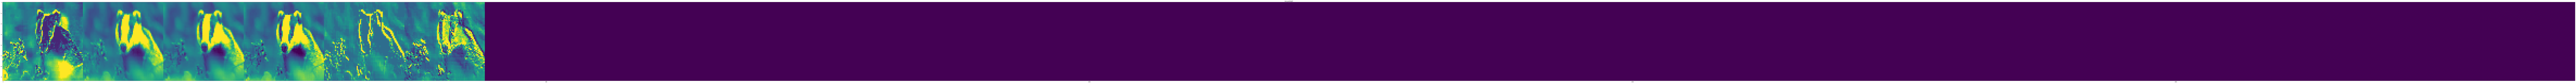

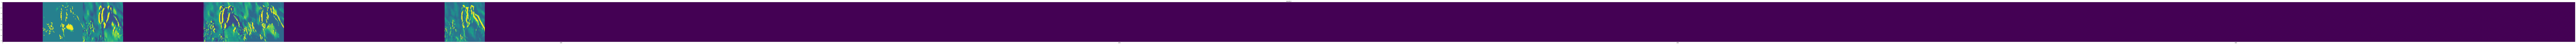

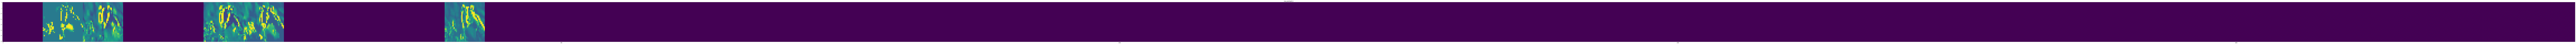

In [50]:
for layer_name,feature_map in zip(layer_names,activations):
    print(f"The shape of the {layer_name} is =======>> {feature_map.shape}")
    if len(feature_map.shape) == 4:
        k = feature_map.shape[-1]
        size=feature_map.shape[1]
        image_belt=np.zeros((size,size*k))
        
        
        for i in range(k//5):
            
            feature_image = feature_map[0, :, :, i]
            
            #Standardization and Normalization of an image to make it palatable to human eyes:-
            feature_image-= feature_image.mean()
            feature_image/= feature_image.std ()
            feature_image*=  64
            feature_image+= 128
            feature_image= np.clip(feature_image, 0, 255).astype('uint8')
            #print(feature_image.shape)
            image_belt[:, i * size : (i + 1) * size] = feature_image
    
        scale = 500. / k
        plt.figure( figsize=(scale * k, scale) )
        plt.title ( layer_name )
        plt.grid  ( False )
        plt.imshow( image_belt, aspect='auto')

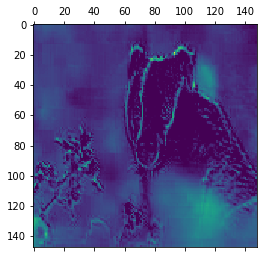

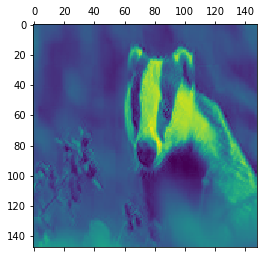

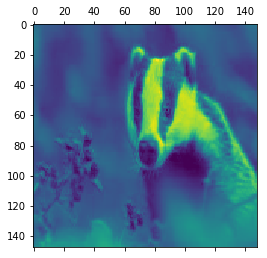

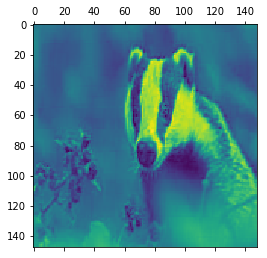

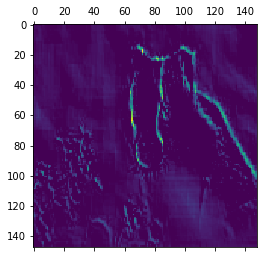

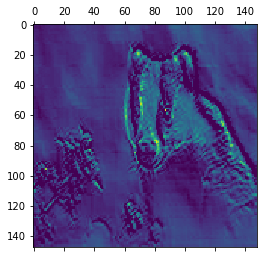

In [53]:
for i in range(6):
    plt.matshow(activations[0][0, :, :, i], cmap ='viridis') 

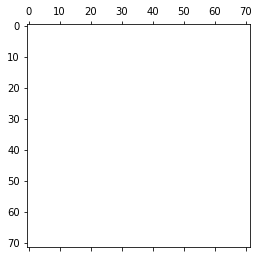

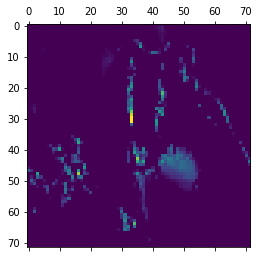

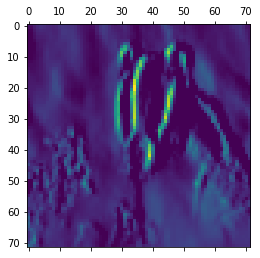

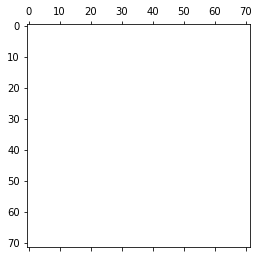

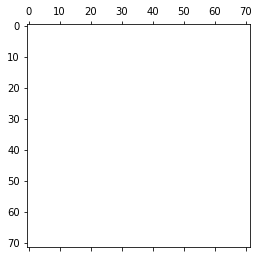

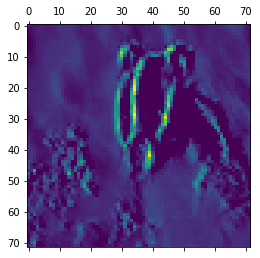

In [55]:
for i in range(6):
    plt.matshow(activations[2][0, :, :, i], cmap ='viridis') 